In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# dataset = https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data

In [2]:
data = pd.read_csv("Fraud.csv")

In [3]:
data_copy =data

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


From above findings there are no missing or null values

In [8]:
realTransaction = data[data['isFraud']==0]
print('Number of Real Transaction = ',len(realTransaction))

Number of Real Transaction =  6354407


In [9]:
fraudTransaction = data[data['isFraud']==1]
print('Number of Fraud Transaction = ',len(fraudTransaction))

Number of Fraud Transaction =  8213


so from above findings it is clear that the data is highy imbalanced

So i need to use these algorithm

1. Random Forest
Why: Ensemble of decision trees is less biased towards majority class.
Using class weighting (class_weight='balanced' in scikit-learn).

2. LightGBM (Gradient Boosting)
Why: Handle imbalance well with proper parameter tuning (scale_pos_weight)


#Plots

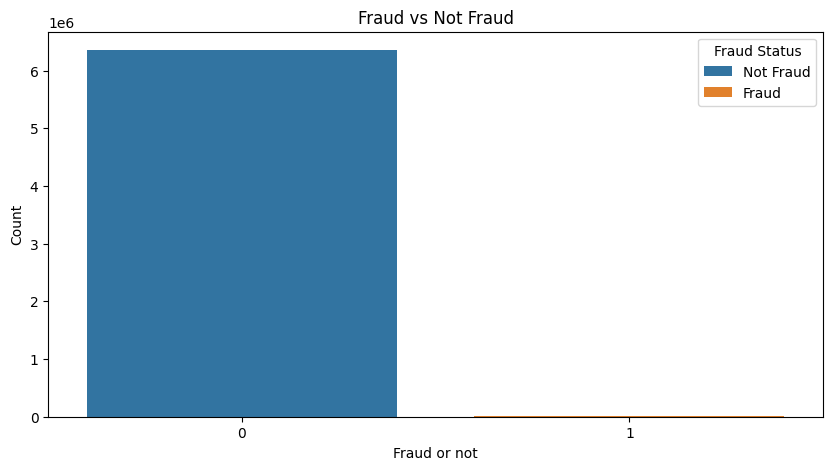

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='isFraud',data=data,hue='isFraud')
plt.xlabel('Fraud or not')
plt.ylabel('Count')
plt.legend(title='Fraud Status', labels=['Not Fraud', 'Fraud'])
plt.title('Fraud vs Not Fraud')
plt.show()

<Axes: >

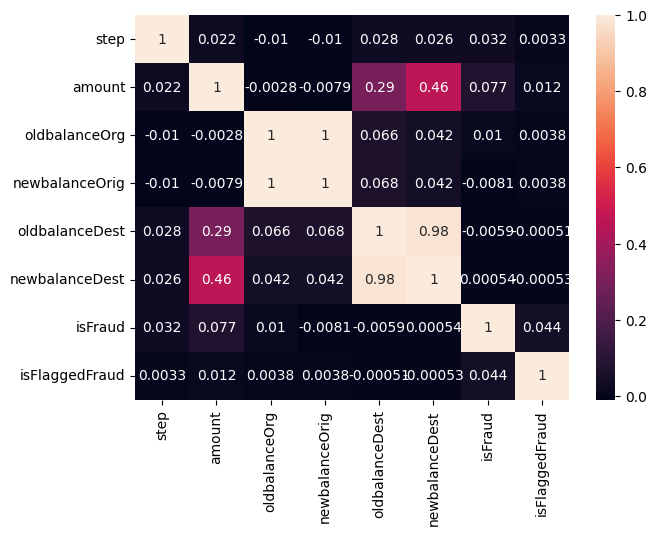

In [11]:
num_col=data.select_dtypes(include=np.number)
plt.figure(figsize=(7,5))
sns.heatmap(num_col.corr(), annot=True)

From above correlation matrix we can see that
1. oldbalanceOrg and newbalanceOrig
2. oldbalanceDest and newbalanceDest

are highly correlated to each other repectively

# Label Encoding

In [12]:
cat_cols = data.select_dtypes(include='object')
cat_cols.head()

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
  data[col] = le.fit_transform(data[col])

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


# checking multicolinearity using varince Inflation Factor

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def vif(data):
  vif = pd.DataFrame()
  data_with_constant = add_constant(data) # adding constant
  vif['variables'] = data_with_constant.columns # this column conatains all column names
  vif['VIF'] = [variance_inflation_factor(data_with_constant.values, i) for i in range(data_with_constant.shape[1])]
  return vif

vif(data)

,variables,VIF
0,const,9.720188
1,step,1.003297
2,type,1.950427
3,amount,3.833588
4,nameOrig,1.000002
5,oldbalanceOrg,544.513377
6,newbalanceOrig,550.846632
7,nameDest,1.675507
8,oldbalanceDest,66.833560
9,newbalanceDest,76.840864


So here also we can see that
1. oldbalanceOrg and newbalanceOrig
2. oldbalanceDest and newbalanceDest
3. nameOrig and nameDest

are having high collinearity as seen in correlation matrix

these columns need to be combined

In [15]:
data['balanceChangeOrig'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balanceChangeDest'] = data['oldbalanceDest'] - data['newbalanceDest']
data['name'] = data['nameOrig'] + data['nameDest']
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceChangeOrig,balanceChangeDest,name
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,9839.64,0.0,2419963
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,1864.28,0.0,3922922
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,181.00,0.0,1441841
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,181.00,21182.0,6219958
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,11668.14,0.0,4274900


In [16]:
data_new = data
data_new = data_new.drop(['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest', 'nameOrig', 'nameDest'],axis=1)


In [17]:
data_new.head(20)

,step,type,amount,isFraud,isFlaggedFraud,balanceChangeOrig,balanceChangeDest,name
0,1,3,9839.64,0,0,9839.64,0.00,2419963
1,1,3,1864.28,0,0,1864.28,0.00,3922922
2,1,4,181.00,1,0,181.00,0.00,1441841
3,1,1,181.00,1,0,181.00,21182.00,6219958
4,1,3,11668.14,0,0,11668.14,0.00,4274900
5,1,3,7817.71,0,0,7817.71,0.00,8273743
6,1,3,7107.77,0,0,7107.77,0.00,3869310
7,1,3,7861.64,0,0,7861.64,0.00,5313179
8,1,3,4024.36,0,0,2671.00,0.00,1638080
9,1,2,5337.77,0,0,5337.77,1549.21,5690236


In [18]:
vif(data_new)

,variables,VIF
0,const,9.089929
1,step,1.002478
2,type,1.230991
3,amount,3.638243
4,isFraud,1.191744
5,isFlaggedFraud,1.002625
6,balanceChangeOrig,1.354177
7,balanceChangeDest,3.732756
8,name,1.060231


Multicolinearity is handled successfully in above cells

# Varible selection?

i selected the variable with help of Variable Inflation Factor and heatmap.

where the Vif values were high it means they are highly correlated and i combined them and the droped the original columns

# Model elaboration

Problem Type

Binary classification (Fraud vs. Not Fraud)
Imbalanced dataset — only a small fraction of isFraud = 1

Model 1: LightGBM (Gradient Boosting)
1. Optimized for speed and performance
2. Handles large datasets efficiently
3. Captures complex patterns
4. Native support for imbalanced datasets (scale_pos_weight)


Model 2: Random Forest
1. Robust to overfitting
2. Easy to interpret using feature importances

# x and y features

In [19]:
x = data_new.drop('isFraud',axis=1)
y = data_new['isFraud']

#MODEL

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train test split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#standard Scaling

In [22]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc = pd.DataFrame(x_sc, columns = x.columns)
x_sc.head()

,step,type,amount,isFlaggedFraud,balanceChangeOrig,balanceChangeDest,name
0,-1.703042,0.952399,-0.281560,-0.001586,0.211876,0.152896,-0.758626
1,-1.703042,0.952399,-0.294767,-0.001586,0.157490,0.152896,-0.000092
2,-1.703042,1.693076,-0.297555,-0.001586,0.146011,0.152896,-1.252277
3,-1.703042,-0.528954,-0.297555,-0.001586,0.146011,0.178952,1.159206
4,-1.703042,0.952399,-0.278532,-0.001586,0.224345,0.152896,0.177548


In [23]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (4453834, 7)
Shape of x_test: (1908786, 7)
Shape of y_train: (4453834,)
Shape of y_test: (1908786,)


#model trainig

# Random Forest

In [24]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(x_train, y_train)

y_pred_rf = random_forest.predict(x_test)


In [30]:
cr = classification_report(y_test, y_pred_rf)
print("-"*30,"Random forest","-"*30)
print("Classification report of Random Forest:\n", cr)
print("="*67)
print("\n")

------------------------------ Random forest ------------------------------
Classification report of Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.74      0.84      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786





In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1906305      46]
 [    641    1794]]


# LGBM

In [26]:
lgbm = LGBMClassifier(
    objective='binary', # clariy is it yes or no problem
    learning_rate=0.05, # small vales means slow learning but carefully learning
    n_estimators=1000, # 1000 decision trees
    scale_pos_weight=10, # tell modle to pay (99%) more attention to minority class
    max_depth=6,
    random_state=42
)

In [ ]:
lgbm.fit(x_train, y_train)
y_pred_lgbm = lgbm.predict(x_test)
y_pred_lgbm

In [28]:
cr = classification_report(y_test, y_pred_lgbm)
print("-"*30,"lgbm","-"*30)
print("Classification report of LGBM:\n", cr)
print("="*67)
print("\n")

------------------------------ lgbm ------------------------------
Classification report of LGBM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.26      0.68      0.38      2435

    accuracy                           1.00   1908786
   macro avg       0.63      0.84      0.69   1908786
weighted avg       1.00      1.00      1.00   1908786





In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1901658    4693]
 [    780    1655]]


# Conclusion

Classification report of Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.74      0.84      2435

    accuracy                           1.00   1908786




---


Classification report of LGBM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.26      0.68      0.38      2435

    accuracy                           1.00   1908786


# Conclusion

1. so both the models have overall perfect accuracy but because of highly imbalanced data,the overall accuracy fails to give the entire story. The real test is how well the model handles the minority class.


2. Rnadom forest outperforms LGBM, because it has better Precision and Recall


3. Whereas LGBM has very less precision.


4. in conclusion Random Forest performs better in detecting minority class with precision = 97% and recall = 74%



# What are the key factors that predict fraudulent customer?

1. The payment Type
2. the Transaction Amount
3. The customer history

# Do these factors make sense? If yes, How? If not, How not?
YES
1. the above factor makes sense because if the payent type is cash-out, it indicates that the fraudulent want to keep the amount as black money to himself

2. The large transaction amonut through cash-out indicates that it is likely a fraud.

3. The customer history helps in identifing a potential future fraudulent.


# What kind of prevention should be adopted while company update its infrastructure?
1. Using HTTPS for brwosing to reduce the risk

2. Use VPN

3. Always keeps the software updated

# Assuming these actions have been implemented, how would you determine if they work?

1. Keeping record of all transaction
2. customer should their
check account activity